# Description

TODO

# Modules loading

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
from IPython.display import display

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import conf

# Load consensus clustering results

In [3]:
# output dir for this notebook
CONSENSUS_CLUSTERING_DIR = Path(
    conf.RESULTS["CLUSTERING_DIR"], "consensus_clustering"
).resolve()

display(CONSENSUS_CLUSTERING_DIR)

PosixPath('/media/miltondp/Elements1/projects/phenoplier/results/clustering/consensus_clustering')

In [4]:
input_file = Path(CONSENSUS_CLUSTERING_DIR, "consensus_clustering_runs.pkl").resolve()
display(input_file)

PosixPath('/media/miltondp/Elements1/projects/phenoplier/results/clustering/consensus_clustering/consensus_clustering_runs.pkl')

In [5]:
consensus_clustering_results = pd.read_pickle(input_file)

In [6]:
consensus_clustering_results.shape

(117, 12)

In [7]:
consensus_clustering_results.head()

,method,partition,k,ari_mean,ari_median,ari_std,ami_mean,ami_median,ami_std,nmi_mean,nmi_median,nmi_std
0,eac_average_coassoc_matrix,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2,0.226733,0.010542,0.351673,0.238194,0.055225,0.325239,0.240435,0.057239,0.324510
1,eac_average_coassoc_matrix,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",3,0.242829,0.015836,0.359734,0.266882,0.080544,0.325173,0.270462,0.083603,0.323833
2,eac_average_coassoc_matrix,"[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...",4,0.260508,0.032736,0.339536,0.296430,0.131213,0.279790,0.301305,0.135507,0.277920
3,eac_average_coassoc_matrix,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",5,0.260519,0.032744,0.339554,0.298287,0.132804,0.281202,0.303842,0.138038,0.278911
4,eac_average_coassoc_matrix,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",6,0.165668,0.091730,0.200208,0.268626,0.236109,0.128800,0.275338,0.237406,0.128180


# Explore best partition per k

## ARI

In [8]:
_col0, _col1 = "ari_mean", "ari_median"
_tmp = (
    consensus_clustering_results.groupby("k")
    .apply(lambda x: x.sort_values(_col0, ascending=False).head(1))
    .sort_values(_col0, ascending=False)[["method", "k", _col0, _col1]]
)
display(_tmp.head(10))

,,method,k,ari_mean,ari_median
k,,,,,
5,3,eac_average_coassoc_matrix,5,0.260519,0.032744
4,2,eac_average_coassoc_matrix,4,0.260508,0.032736
7,44,eac_single_coassoc_matrix,7,0.254430,0.024547
8,45,eac_single_coassoc_matrix,8,0.254425,0.024531
9,46,eac_single_coassoc_matrix,9,0.254425,0.024531
6,43,eac_single_coassoc_matrix,6,0.254424,0.024557
3,79,eac_complete_coassoc_matrix,3,0.244901,0.028536
20,57,eac_single_coassoc_matrix,20,0.228563,0.031987
14,51,eac_single_coassoc_matrix,14,0.227603,0.026364


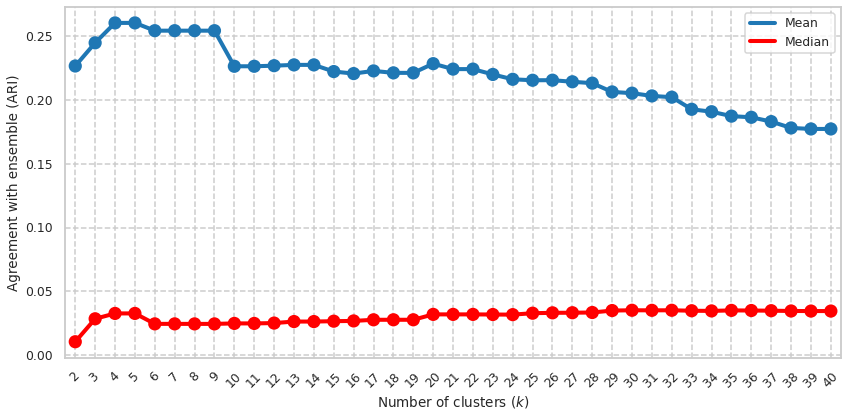

In [9]:
with sns.plotting_context("talk", font_scale=0.75), sns.axes_style(
    "whitegrid", {"grid.linestyle": "--"}
):
    fig, ax = plt.subplots(figsize=(12, 6))
    ax = sns.pointplot(data=_tmp, x="k", y=_col0, ci=None, label="One")
    ax = sns.pointplot(
        data=_tmp, x="k", y=_col1, ci=None, color="red", label="Two", ax=ax
    )
    ax.set_ylabel("Agreement with ensemble (ARI)")
    ax.set_xlabel("Number of clusters ($k$)")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    plt.legend(labels=["Mean", "Median"])
    plt.grid(True)
    plt.tight_layout()

## NMI

In [10]:
_col0, _col1 = "nmi_mean", "nmi_median"
_tmp = (
    consensus_clustering_results.groupby("k")
    .apply(lambda x: x.sort_values(_col0, ascending=False).head(1))
    .sort_values(_col0, ascending=False)[["method", "k", _col0, _col1]]
)
display(_tmp.head(10))

,,method,k,nmi_mean,nmi_median
k,,,,,
5,3,eac_average_coassoc_matrix,5,0.303842,0.138038
4,2,eac_average_coassoc_matrix,4,0.301305,0.135507
22,20,eac_average_coassoc_matrix,22,0.299637,0.312750
28,26,eac_average_coassoc_matrix,28,0.299345,0.330707
21,19,eac_average_coassoc_matrix,21,0.298802,0.310595
26,24,eac_average_coassoc_matrix,26,0.298416,0.329697
27,25,eac_average_coassoc_matrix,27,0.298231,0.329658
23,21,eac_average_coassoc_matrix,23,0.298225,0.323185
25,23,eac_average_coassoc_matrix,25,0.298222,0.329552


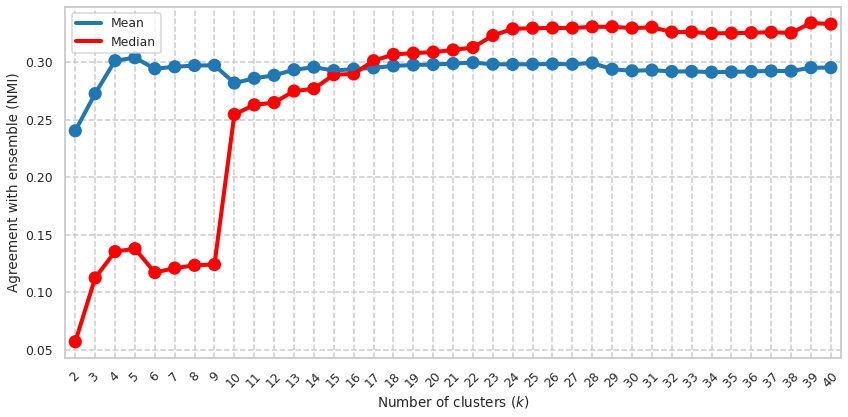

In [11]:
with sns.plotting_context("talk", font_scale=0.75), sns.axes_style(
    "whitegrid", {"grid.linestyle": "--"}
):
    fig, ax = plt.subplots(figsize=(12, 6))
    ax = sns.pointplot(data=_tmp, x="k", y=_col0, ci=None, label="One")
    ax = sns.pointplot(
        data=_tmp, x="k", y=_col1, ci=None, color="red", label="Two", ax=ax
    )
    ax.set_ylabel("Agreement with ensemble (NMI)")
    ax.set_xlabel("Number of clusters ($k$)")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    plt.legend(labels=["Mean", "Median"])
    plt.grid(True)
    plt.tight_layout()

## AMI

In [12]:
_col0, _col1 = "ami_mean", "ami_median"
_tmp = (
    consensus_clustering_results.groupby("k")
    .apply(lambda x: x.sort_values(_col0, ascending=False).head(1))
    .sort_values(_col0, ascending=False)[["method", "k", _col0, _col1]]
)
display(_tmp.head(10))

,,method,k,ami_mean,ami_median
k,,,,,
5,3,eac_average_coassoc_matrix,5,0.298287,0.132804
4,2,eac_average_coassoc_matrix,4,0.296430,0.131213
8,45,eac_single_coassoc_matrix,8,0.289645,0.115998
9,46,eac_single_coassoc_matrix,9,0.289605,0.115866
7,44,eac_single_coassoc_matrix,7,0.289226,0.114036
6,43,eac_single_coassoc_matrix,6,0.288249,0.110805
22,20,eac_average_coassoc_matrix,22,0.282864,0.287903
14,12,eac_average_coassoc_matrix,14,0.282834,0.261155
21,19,eac_average_coassoc_matrix,21,0.282573,0.286830


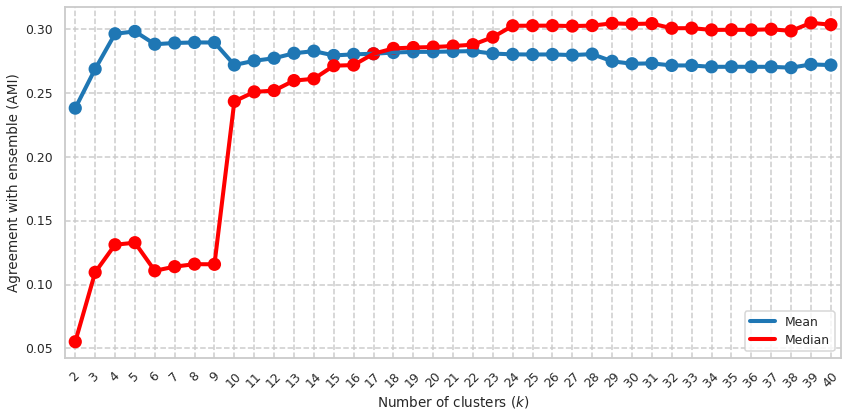

In [13]:
with sns.plotting_context("talk", font_scale=0.75), sns.axes_style(
    "whitegrid", {"grid.linestyle": "--"}
):
    fig, ax = plt.subplots(figsize=(12, 6))
    ax = sns.pointplot(data=_tmp, x="k", y=_col0, ci=None, label="One")
    ax = sns.pointplot(
        data=_tmp, x="k", y=_col1, ci=None, color="red", label="Two", ax=ax
    )
    ax.set_ylabel("Agreement with ensemble (AMI)")
    ax.set_xlabel("Number of clusters ($k$)")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    plt.legend(labels=["Mean", "Median"])
    plt.grid(True)
    plt.tight_layout()

**It is interesting to see that:**
1. AMI values (an adjusted-for-chance index) very similar to NMI (not adjusted-for-chance).
1. All measures coincide that a `k` around 4 or 5 gives the maximum agreement with the ensemble.
1. For ARI, partitions with more clusters have a smaller agreement with the ensemble, which is expected. This is not the case with AMI and NMI.

**I will use ARI in the next analysis.**

# Select best partition per k

In [26]:
_measure_col = "ari_mean"
best_parts = (
    consensus_clustering_results.groupby("k")
    .apply(lambda x: x.sort_values(_measure_col, ascending=False).head(1))
    .sort_values(_measure_col, ascending=False)[
        ["method", "k", "partition", _measure_col]
    ]
)

In [27]:
best_parts = best_parts.set_index("k")

In [28]:
best_parts.shape

(39, 3)

In [29]:
# show partitions with top ARI
best_parts.head(10)

,method,partition,ari_mean
k,,,
5,eac_average_coassoc_matrix,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.260519
4,eac_average_coassoc_matrix,"[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...",0.260508
7,eac_single_coassoc_matrix,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.254430
8,eac_single_coassoc_matrix,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.254425
9,eac_single_coassoc_matrix,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.254425
6,eac_single_coassoc_matrix,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.254424
3,eac_complete_coassoc_matrix,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.244901
20,eac_single_coassoc_matrix,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.228563
14,eac_single_coassoc_matrix,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.227603


In [30]:
best_parts.sort_values("k")

,method,partition,ari_mean
k,,,
2,eac_average_coassoc_matrix,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.226733
3,eac_complete_coassoc_matrix,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.244901
4,eac_average_coassoc_matrix,"[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...",0.260508
5,eac_average_coassoc_matrix,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.260519
6,eac_single_coassoc_matrix,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.254424
7,eac_single_coassoc_matrix,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.254430
8,eac_single_coassoc_matrix,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.254425
9,eac_single_coassoc_matrix,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.254425
10,eac_single_coassoc_matrix,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.226513


## Save best partitions per k

In [19]:
output_file = Path(CONSENSUS_CLUSTERING_DIR, "best_partitions_by_k.pkl").resolve()
display(output_file)

PosixPath('/media/miltondp/Elements1/projects/phenoplier/results/clustering/consensus_clustering/best_partitions_by_k.pkl')

In [20]:
best_parts.to_pickle(output_file)